<a href="https://colab.research.google.com/github/Sharr0/PPPO/blob/main/PPPO-Marko-Galic-IT80-2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Detekcija godina, pola i emocija**

**Student**: Marko Galić IT80/2018

**Predmet**: Principi prezentacije i prepoznavanja oblika

# **Uvod**

---

Duboko učenje (hijerarhijsko učenje), deo je šire porodice metoda mašinskog učenja koje su bazirane na učenju reprezentacije podataka, nasuprot algoritmima koji se baziraju na listama naredbi. Učenje može biti nadgledano, polu-nadgledano ili nenadgledano.

Neke reprezentacije podsećaju na interpretaciju obrade informacija i na šablone komunikacije u biološkom nervnom sistemu, kao što je nervno kodiranje koje definiše vezu između različitih draži i odgovarajućeg nervnog odgovora u mozgu.

Duboko učenje je našlo primenu na poljima računarskog vida, prepoznavanja govora, obrade prirodnih jezika, prepoznavanje zvuka i tako dalje.

Arhitekture dubokog učenja, kao što su duboka nervna mreža ili rekurentna nervna mreža primenjena su na poljima računarskog vida, prepoznavanja govora, obrade prirodnih jezika, prepoznavanja zvuka, filtriranja društvenih mreža, bioinformatike i dizajna lekova i postigli rezultate jednake, ako ne i bolje od rezultata stručnjaka.

Duboko učenje i računarska vizija istražuju primenu veštačke inteligencije u analizi vizuelnih podataka. Duboko učenje se fokusira na učenje složenih reprezentacija podataka, dok računarska vizija razvija algoritme za analizu i razumevanje slika i video zapisa. Ova dva polja imaju široku primenu, uključujući medicinsku dijagnostiku, sigurnosne sisteme i autonomna vozila. Uvod u demu ove oblasti ima za cilj da predstavi osnovne koncepte i primene kroz konkretne primere.

---



# **Podaci**

Kao zadatak dobio sam skup podataka koji je raspoređen u folderu, pri čemu on sadrži 100 podfoldera sa slikama koje se koriste za trening. Svaki podfolder ima približno 600 slika. Analizom lica čoveka možemo dobiti mnogo informacija kao što su starost, pol, emocije, itd.

Set podataka je okačen na drajvu:
https://drive.google.com/file/d/1yytNs_r9VRs9A-kdULldUKh56zN_QQSm/view?usp=sharing

Prvo je potrebno učitati *dataset* i *unzip*-ovati ga

In [3]:
#Instalacija gdown biblioteke
!pip install gdown

In [6]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=1yytNs_r9VRs9A-kdULldUKh56zN_QQSm'
output = '/content/AgeGenderEmotionDataset.zip'

#preuzima dataset sa URL i čuva na set-ovanom output-u
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1yytNs_r9VRs9A-kdULldUKh56zN_QQSm
From (redirected): https://drive.google.com/uc?export=download&id=1yytNs_r9VRs9A-kdULldUKh56zN_QQSm&confirm=t&uuid=0c0be8bf-c185-4db8-b8ff-1dc3e406e005
To: /content/AgeGenderEmotionDataset.zip
100%|██████████| 718M/718M [00:09<00:00, 72.8MB/s]


'/content/AgeGenderEmotionDataset.zip'

In [11]:
!unzip AgeGenderEmotionDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: wiki_crop/91/7259691_1983-04-27_2012.jpg  
  inflating: wiki_crop/91/7287691_1979-08-29_2012.jpg  
  inflating: wiki_crop/91/7294591_1987-12-25_2011.jpg  
  inflating: wiki_crop/91/731591_1964-07-17_2008.jpg  
  inflating: wiki_crop/91/739691_1956-09-20_2011.jpg  
  inflating: wiki_crop/91/741791_1917-12-18_2004.jpg  
  inflating: wiki_crop/91/743391_1954-03-15_2015.jpg  
  inflating: wiki_crop/91/7464891_1984-09-30_2013.jpg  
  inflating: wiki_crop/91/7534191_1983-04-17_2010.jpg  
  inflating: wiki_crop/91/763791_1934-12-30_1990.jpg  
  inflating: wiki_crop/91/7671891_1987-03-02_2006.jpg  
  inflating: wiki_crop/91/7711491_1982-12-06_2014.jpg  
  inflating: wiki_crop/91/77491_1916-04-05_1948.jpg  
  inflating: wiki_crop/91/779591_1953-03-01_2014.jpg  
  inflating: wiki_crop/91/7798491_1947-01-25_2013.jpg  
 extracting: wiki_crop/91/783791_1917-06-18_1967.jpg  
  inflating: wiki_crop/91/794891_1970-02-12_2011.jpg  
  infla

# **Dataset**

U datasetu se pored foldera sa slikama nalazio i .mat fajl sa meta podacima dataseta, potrebno je učitati ga i prebaciti ga u .csv fajl.

In [12]:
from scipy.io import loadmat

loadmat('/content/wiki_crop/wiki.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

In [13]:
#konvertovanje iz .mat u .csv

#podržava nizove i matrice
import numpy as np

#sadrži loadmat funkciju
from scipy.io import loadmat

#reprezentacija i manipulacija podacima
import pandas as pd

#rad sa datumima
import datetime as date

#razlika između dva datuma
from dateutil.relativedelta import relativedelta

#dat je prikaz kolona u .csv fajlu
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

#putanja do wiki.mat fajla
wiki_mat = '/content/wiki_crop/wiki.mat'

#učitavanje .mat fajla
wiki_data = loadmat(wiki_mat)

#brisanje wiki.mat fajla
del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

wiki_age = []

#računa razliku od datuma rođenja osobe i kada je slika kreirana
for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

#čuva podatke u formi DataFrame-a, odnosno dvodimenzionalne tabele
final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

#genrisanje 100% uzorka
meta = meta.sample(frac=1)

#vrši se konverzija u .csv format
meta.to_csv('meta.csv', index=False)

In [14]:
data = pd.read_csv('meta.csv')
data.head()

,age,gender,path
0,26,female,wiki_crop/16/17849616_1983-10-06_2010.jpg
1,33,female,wiki_crop/77/6839177_1975-07-30_2009.jpg
2,57,male,wiki_crop/72/26272_1952-01-17_2010.jpg
3,37,male,wiki_crop/51/35724551_1973-08-03_2011.jpg
4,33,male,wiki_crop/45/1250445_1976-09-03_2010.jpg


In [15]:
data.columns

Index(['age', 'gender', 'path'], dtype='object')

In [16]:
data.shape

(40216, 3)

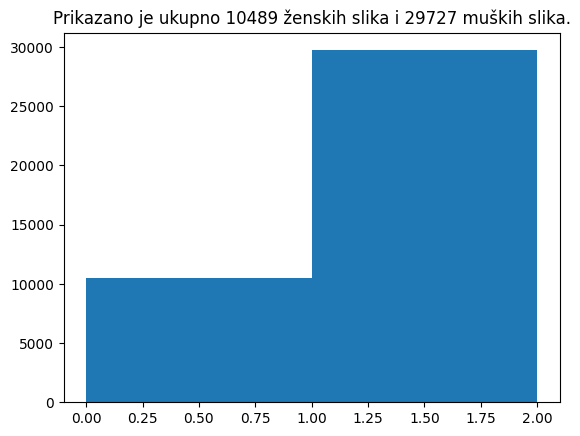

In [17]:
#prikaz dataset-a koji nije izbalansiran
import matplotlib.pyplot as plt #koristi se za prikazivanje podataka u obliku histograma

gender = []
for g in data['gender'].values: #proverava se koji je pol u pitanju i dodaje odgovarajućem skupu
    if g == 'male':
        gender.append(1)
    else:
        gender.append(0)


plt.hist(gender, range(3))
plt.title('Prikazano je ukupno ' + str(len(gender) - sum(gender)) + ' ženskih slika i ' + str(sum(gender)) + ' muških slika.')
plt.show()

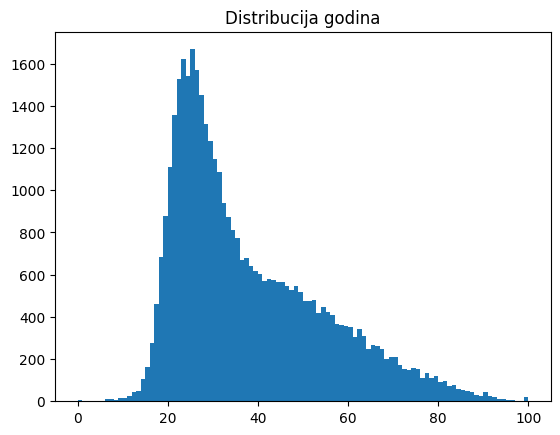

In [18]:
#sledeći histogram daje prikaz distribucije godina
plt.hist(data['age'], range(101))
plt.title('Distribucija godina')
plt.show()

# **Godine**

Nakon što su prikazani histogrami, sledeća ćelija služi za filtriranje i dalje procesiranje slika, kako bi detekcija godina mogla da se izvrši na zadovoljavajući način.

In [19]:
#neophodni moduli
import pandas as pd
import numpy as np

#read i write image-a
import cv2

#sadrži funkcije za interakciju sa operativnim sistemom
import os
from sklearn.model_selection import train_test_split

#dataset se učitava
meta = pd.read_csv('meta.csv')

#neophodne samo godine
meta = meta.drop(['gender'], axis=1)

#dataset se filtrira (godine u rasponu od 0 do 101)
meta = meta[meta['age'] >= 0]
meta = meta[meta['age'] <= 101]

#podaci se transformišu u numpy array
meta = meta.values

#dataset se deli na trening i testni skup u odnosu 80% - 20%
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42)

In [20]:
#Kreiranje direktorijuma
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)


In [21]:
#trening i testni dataset-ovi se kreiraju
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128)) #vrši se resize-ovanje slike na 128 piksela
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('Procesiranje: '+str(counter) +' Slika: ' + str(image[0]))
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('Procesiranje: '+str(counter) +' Slika: ' + str(image[0]))
    counter += 1

Streaming output truncated to the last 5000 lines.
Procesiranje: 3033 Slika: 44
Procesiranje: 3034 Slika: 46
Procesiranje: 3035 Slika: 32
Procesiranje: 3036 Slika: 86
Procesiranje: 3037 Slika: 50
Procesiranje: 3038 Slika: 26
Procesiranje: 3039 Slika: 36
Procesiranje: 3040 Slika: 60
Procesiranje: 3041 Slika: 35
Procesiranje: 3042 Slika: 60
Procesiranje: 3043 Slika: 35
Procesiranje: 3044 Slika: 64
Procesiranje: 3045 Slika: 40
Procesiranje: 3046 Slika: 35
Procesiranje: 3047 Slika: 38
Procesiranje: 3048 Slika: 47
Procesiranje: 3049 Slika: 26
Procesiranje: 3050 Slika: 21
Procesiranje: 3051 Slika: 58
Procesiranje: 3052 Slika: 6
Procesiranje: 3053 Slika: 45
Procesiranje: 3054 Slika: 26
Procesiranje: 3055 Slika: 37
Procesiranje: 3056 Slika: 27
Procesiranje: 3057 Slika: 73
Procesiranje: 3058 Slika: 28
Procesiranje: 3059 Slika: 16
Procesiranje: 3060 Slika: 20
Procesiranje: 3061 Slika: 26
Procesiranje: 3062 Slika: 38
Procesiranje: 3063 Slika: 31
Procesiranje: 3064 Slika: 70
Procesiranje: 3065 Sli

# **Pol**

Sada se radi o procesu za obučavanje i tesitranje modela za pol. Slično je kao i za detekciju godina, sem sto se koristi kolona gender.

In [22]:
#neophodni moduli
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split


meta = pd.read_csv('meta.csv')

meta = meta.drop(['age'], axis=1)

#Deljenje u odnosu 10%-90%
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

#balansiranje trening skupa zbog nejednakosti u broju muškaraca i žena. Selektuje se isti broj slika
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

extra = D_train_male[no_female:]
D_train_male = D_train_male[0:no_female]

D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

#mešanje podataka
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

#kreiranje neophodnih direktorijuma
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

In [23]:
#učitavanje slika u testni i trening skup
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1

counter = 0

for image in D_test.values: #pristupa se vrednostima kolona
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1

Streaming output truncated to the last 5000 lines.
Processing: 16286 Image: male
Processing: 16287 Image: male
Processing: 16288 Image: male
Processing: 16289 Image: male
Processing: 16290 Image: female
Processing: 16291 Image: male
Processing: 16292 Image: male
Processing: 16293 Image: male
Processing: 16294 Image: male
Processing: 16295 Image: male
Processing: 16296 Image: male
Processing: 16297 Image: male
Processing: 16298 Image: male
Processing: 16299 Image: male
Processing: 16300 Image: male
Processing: 16301 Image: male
Processing: 16302 Image: male
Processing: 16303 Image: male
Processing: 16304 Image: male
Processing: 16305 Image: male
Processing: 16306 Image: male
Processing: 16307 Image: male
Processing: 16308 Image: male
Processing: 16309 Image: male
Processing: 16310 Image: female
Processing: 16311 Image: male
Processing: 16312 Image: male
Processing: 16313 Image: male
Processing: 16314 Image: male
Processing: 16315 Image: male
Processing: 16316 Image: male
Processing: 163

# **Modeli**

Treninzi, kreiranje modela za prepoznavanje pola i godina.

Instaliraju se sve potrebne biblioteke.

TensorFlow za duboko i mašinsko učenje koja omogućava razvoj, obuku i primenu različitih modela veštačke inteligencije, dok je Keras kolekcija modela dubokog učenja već unapred obučenih modela.

In [24]:
!pip install tensorflow
!pip install keras_applications
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


**Model za detekciju pola**

Za kreiranje datog modela korišćena je Keras biblioteka. Ona koristi grupu biblioteka nižeg nivoa, među kojima je i TensorFlow. Pojednostavljuje pisanje koda za duboke neuronske mreže. Implementacija je urađena u narednoj ćeliji.

In [25]:
#neophodni dependencijevi

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [26]:
#drugi korak je kreiranje modela

#arhitektura se zasniva na sekvenci slojeva modela
#sekvencijalni model, koji podrazumeva niz slojeva modela
model = Sequential()

#MobileNetV2 jeste sledeći model koji se koristi
#model koji je učitan sa težinama koje su unapred učitane u ImageNet-u
mobile = MobileNetV2(include_top=False,
                          weights="imagenet",
                          input_shape=(128,128,3),
                          pooling="max")

#mobile model se dodaje i konfiguriše se output sloj
#Dense je sloj neuronske mreže koji ima dva neurona, a tip funkcije koja ga aktivira je softmax
model.add(mobile)
model.add(Dense(units=2, activation="softmax"))

#model se kompajlira i navode se optimizatori
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

#podaci o modelu se print-uju
print(model.summary())


#koristi se ImageDataGenerator klasa za data augmentaciju
#omogućenje augmentacije dok se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

#čita se trening skup
#navodi se dimenzija treniranja
#categorical - je zapravo 2D niz one-hot labela
train_generator = train_datagen.flow_from_directory('dataset/gender/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#čita se testni skup
test_set = test_datagen.flow_from_directory('dataset/gender/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

#za bolje rezultate vrši se prilagođavanje epohe
history1 = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=50)

#poslednji korak podrazumeva čuvanje modela
model.save('weights/gender_mobile.h5')

9406464/9406464 [==============================] - 0s 0us/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2226434 (8.49 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________
None
Found 18930 images belonging to 2 classes.
Found 21286 images belonging to 2 classes.


<ipython-input-26-f4d523c99ed2>:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(train_generator,


Epoch 1/10
100/100 [==============================] - 64s 388ms/step - loss: 0.7341 - accuracy: 0.7695 - val_loss: 2.9530 - val_accuracy: 0.0594
Epoch 2/10
100/100 [==============================] - 38s 378ms/step - loss: 0.3866 - accuracy: 0.8370 - val_loss: 3.1545 - val_accuracy: 0.3809
Epoch 3/10
100/100 [==============================] - 40s 399ms/step - loss: 0.3254 - accuracy: 0.8658 - val_loss: 1.9397 - val_accuracy: 0.0494
Epoch 4/10
100/100 [==============================] - 39s 386ms/step - loss: 0.3159 - accuracy: 0.8717 - val_loss: 1.2119 - val_accuracy: 0.0531
Epoch 5/10
100/100 [==============================] - 38s 382ms/step - loss: 0.2999 - accuracy: 0.8854 - val_loss: 5.2387 - val_accuracy: 0.2331
Epoch 6/10
100/100 [==============================] - 38s 378ms/step - loss: 0.2748 - accuracy: 0.8970 - val_loss: 3.8801 - val_accuracy: 0.2600
Epoch 7/10
100/100 [==============================] - 36s 361ms/step - loss: 0.2734 - accuracy: 0.8925 - val_loss: 0.8409 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


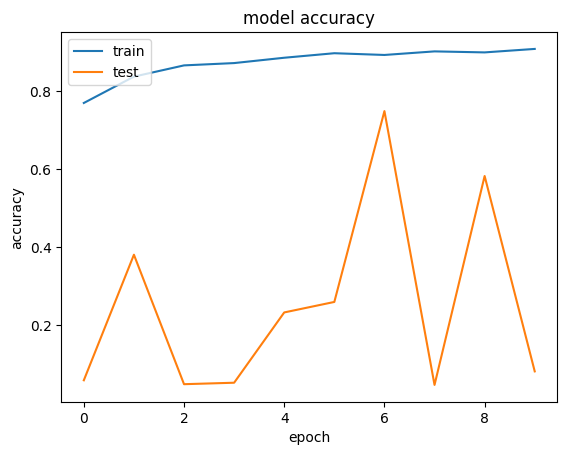

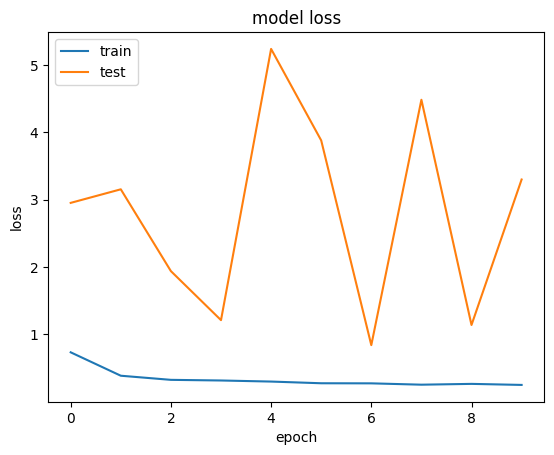

In [27]:
#nakon što izvršavanje završeno radi se analiza performansi modela
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 103ms/step


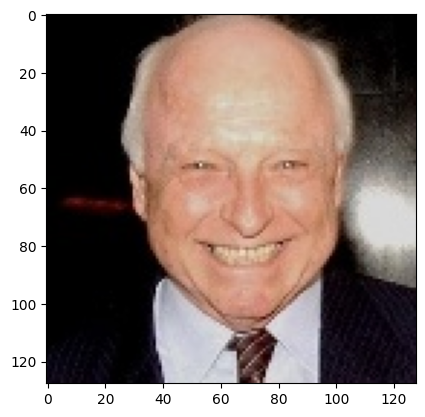

Žensko


In [31]:
#vrši se provera modela
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/69/514.jpg'
gender_pred = model.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

if gender_pred[0][0]>gender_pred[0][1]:
  print('Žensko')
else:
  print('Muško')

**Model za detekciju godina**

Sledeći model predstavlja model koji se koristi kako bi se predvidele godine kod osobe sa slike. Kreiran na isti način kao i model za detekciju pola osobe.

In [32]:
#neophodni dependencijevi
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [37]:
#kreiranje sekvencijalnog modela
model2 = Sequential()

#drugi tip modela koji se koristi InceptionResNetV2
mobile = InceptionResNetV2(include_top=False,
                          weights="imagenet",
                          input_shape=(128,128,3),
                          pooling="max")

#dodaje se mobile model
#sloj neuronske mreže sa 102 neurona i tip funkcije aktivacije je softmax
model2.add(mobile)
model2.add(Dense(units=102, activation="softmax"))

#model se kompajlira i navode se optimizatori
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])

#prikaz podataka
print(model2.summary())

#ImageDataGenerator se koristi za augmentaciju, koja se primenjuje dok se model trenira
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

#trening skup se čita
train_generator = train_datagen.flow_from_directory('dataset/age/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#testni skup se isčitava
test_set = test_datagen.flow_from_directory('dataset/age/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

#zbog performantnosti se prilagođavaju epohe
history2 = model2.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=25)

#model se čuva
model2.save('weights/age_inception.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1536)              54336736  
 ional)                                                          
                                                                 
 dense_4 (Dense)             (None, 102)               156774    
                                                                 
Total params: 54493510 (207.88 MB)
Trainable params: 54432966 (207.65 MB)
Non-trainable params: 60544 (236.50 KB)
_________________________________________________________________
None
Found 32129 images belonging to 102 classes.
Found 8033 images belonging to 102 classes.


<ipython-input-37-bcf64cbfe598>:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train_generator,


Epoch 1/10
100/100 [==============================] - 107s 493ms/step - loss: 4.6714 - accuracy: 0.0281 - val_loss: 4.6656 - val_accuracy: 0.0256
Epoch 2/10
100/100 [==============================] - 45s 448ms/step - loss: 4.2837 - accuracy: 0.0356 - val_loss: 4.2949 - val_accuracy: 0.0262
Epoch 3/10
100/100 [==============================] - 44s 437ms/step - loss: 4.1491 - accuracy: 0.0417 - val_loss: 4.2179 - val_accuracy: 0.0369
Epoch 4/10
100/100 [==============================] - 47s 464ms/step - loss: 4.0642 - accuracy: 0.0383 - val_loss: 4.1858 - val_accuracy: 0.0338
Epoch 5/10
100/100 [==============================] - 44s 434ms/step - loss: 3.9715 - accuracy: 0.0423 - val_loss: 4.3707 - val_accuracy: 0.0394
Epoch 6/10
100/100 [==============================] - 47s 464ms/step - loss: 3.9191 - accuracy: 0.0478 - val_loss: 4.0535 - val_accuracy: 0.0431
Epoch 7/10
100/100 [==============================] - 44s 439ms/step - loss: 3.8758 - accuracy: 0.0505 - val_loss: 4.0246 - val_a

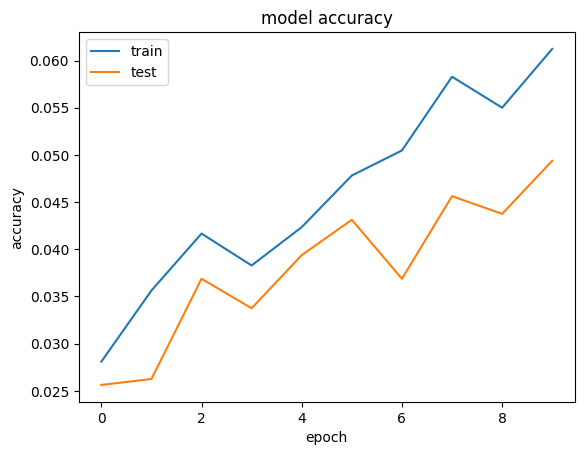

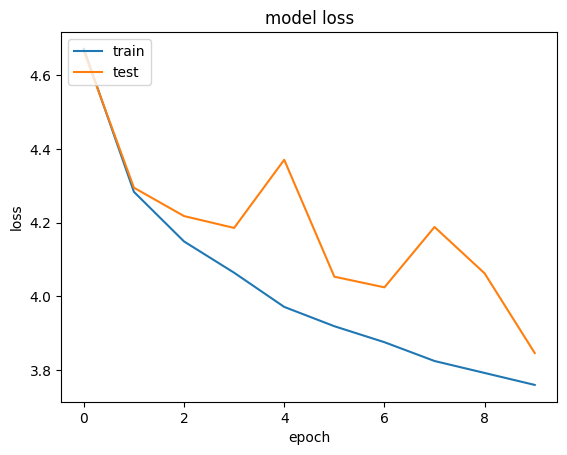

In [38]:
#analiziraju se performanse modela
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 75ms/step


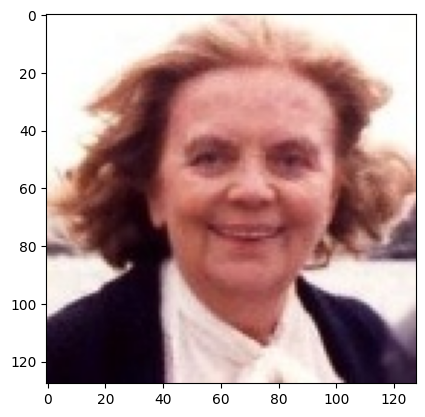

70
50-74 godina


In [45]:
#rezultati se proveravaju
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/69/2908.jpg'
age_pred= model2.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

print(temp)
if temp in range(0, 24):
  print('0-24 godina')
if temp in range(25, 49):
  print('25-49 godina')
if temp in range(50, 74):
  print('50-74 godina')
if temp in range(75, 99):
  print('75-99 godina')
if temp in range(91, 101):
  print('91-101 godina')

**Model za detekciju emocija**

Kod modela za detekciju emocija koristimo DeepFace algoritam, kao i cv2 modul (OpenCV biblioteka - funkcije za kompjutersku viziju i proces slika)

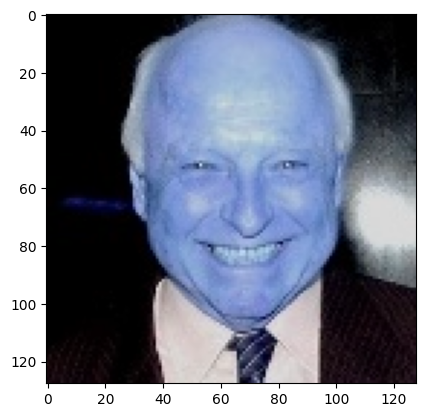

In [60]:
import cv2
from deepface import DeepFace
img = cv2.imread('/content/dataset/age/test/69/514.jpg')
import matplotlib.pyplot as plt
plt.imshow(img) #prikazaće plavu nijasnu

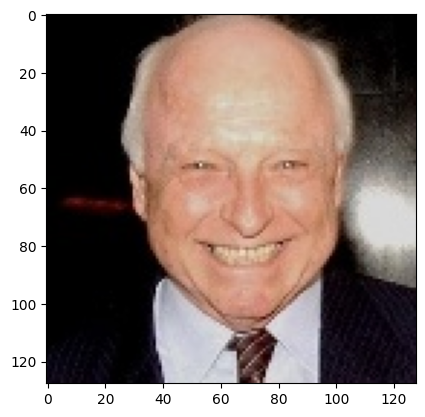

In [61]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #vraćanje slike na prirodan ten

In [62]:
predictions = DeepFace.analyze(img) #analiza slike

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

24-04-10 00:06:23 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

  0%|          | 0.00/5.98M [00:00<?, ?B/s]
 26%|██▋       | 1.57M/5.98M [00:00<00:00, 14.4MB/s]
100%|██████████| 5.98M/5.98M [00:00<00:00, 24.5MB/s]
Action: age:  25%|██▌       | 1/4 [00:01<00:04,  1.50s/it]    

24-04-10 00:06:25 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  0%|          | 524k/539M [00:00<02:09, 4.17MB/s]
  0%|          | 2.10M/539M [00:00<00:55, 9.75MB/s]
  1%|          | 5.24M/539M [00:00<00:29, 18.3MB/s]
  2%|▏         | 9.44M/539M [00:00<00:19, 26.8MB/s]
  3%|▎         | 16.3M/539M [00:00<00:13, 39.9MB/s]
  4%|▍         | 23.6M/539M [00:00<00:10, 49.7MB/s]
  6%|▌         | 31.5M/539M [00:00<00:08, 58.1MB/s]
  7%|▋         | 39.3M/539M [00:00<00:07, 62.6MB/s]
  9%|▊         | 46.1M/539M [00:00<00:07, 63.7MB/s]
 10%|█         | 54.5M/539M [00:01<00:06, 69.6MB/s]
 11%|█▏        | 61.9M/539M [00:01<00:07, 64.1MB/s]
 13%|█▎        | 70.3M/539M [00:01<00:06, 67.0MB/s]
 15%|█▌        | 81.3M/539M [00:01<00:05, 78.7MB/s]
 19%|█▉        | 102M/539M [00:01<00:03, 114MB/s]  
 23%|██▎       | 124M/539M [00:01<00:02, 144MB/s]
 27%|██▋       | 146M

24-04-10 00:06:34 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 2.10M/537M [00:00<00:25, 20.7MB/s]
  1%|          | 6.29M/537M [00:00<00:16, 32.7MB/s]
  3%|▎         | 14.2M/537M [00:00<00:09, 53.0MB/s]
  5%|▌         | 29.4M/537M [00:00<00:05, 90.9MB/s]
 11%|█         | 56.6M/537M [00:00<00:03, 155MB/s] 
 16%|█▋        | 88.1M/537M [00:00<00:02, 209MB/s]
 21%|██        | 111M/537M [00:00<00:01, 214MB/s] 
 26%|██▋       | 141M/537M [00:00<00:01, 242MB/s]
 32%|███▏      | 169M/537M [00:00<00:01, 254MB/s]
 37%|███▋      | 198M/537M [00:01<00:01, 261MB/s]
 42%|████▏     | 225M/537M [00:01<00:01, 264MB/s]
 48%|████▊     | 256M/537M [00:01<00:01, 279MB/s]
 54%|█████▍    | 289M/537M [00:01<00:00, 292MB/s]
 60%|█████▉    | 320M/537M [00:01<00:00, 298MB/s]
 66%|██████▌   | 352M/537M [00:01<00:00, 304MB/s]
 72%|███████▏  | 385M/537M [00

24-04-10 00:06:39 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 2.10M/537M [00:00<00:30, 17.8MB/s]
  1%|          | 4.72M/537M [00:00<00:38, 13.9MB/s]
  2%|▏         | 12.1M/537M [00:00<00:15, 33.0MB/s]
  3%|▎         | 16.8M/537M [00:00<00:13, 37.5MB/s]
  4%|▍         | 21.5M/537M [00:00<00:13, 39.7MB/s]
  5%|▌         | 28.8M/537M [00:00<00:10, 49.0MB/s]
  7%|▋         | 35.7M/537M [00:00<00:09, 53.4MB/s]
  8%|▊         | 43.5M/537M [00:00<00:08, 60.1MB/s]
  9%|▉         | 50.9M/537M [00:01<00:07, 62.7MB/s]
 11%|█         | 57.7M/537M [00:01<00:08, 54.6MB/s]
 12%|█▏        | 63.4M/537M [00:01<00:08, 54.5MB/s]
 13%|█▎        | 70.8M/537M [00:01<00:08, 58.2MB/s]
 15%|█▍        | 78.1M/537M [00:01<00:07, 61.6MB/s]
 16%|█▌        | 84.9M/537M [00:01<00:07, 63.3MB/s]
 17%|█▋        | 92.3M/537M [00:01<00:06, 65.6MB/s]
 19%|█

In [63]:
predictions #prikaz vrednosti za sliku, gledamo dominant_emotion

[{'emotion': {'angry': 4.693932629251311e-12,
   'disgust': 2.977902131963081e-20,
   'fear': 3.130387896566375e-13,
   'happy': 99.99330639799275,
   'sad': 3.284106169025977e-09,
   'surprise': 3.760984525942667e-08,
   'neutral': 0.006695317678153823},
  'dominant_emotion': 'happy',
  'region': {'x': 32,
   'y': 26,
   'w': 73,
   'h': 73,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.94,
  'age': 39,
  'gender': {'Woman': 1.1944716796278954, 'Man': 98.80552887916565},
  'dominant_gender': 'Man',
  'race': {'asian': 0.003826881220447831,
   'indian': 0.0003232817789466935,
   'black': 1.0000118777497846e-05,
   'white': 99.7439980506897,
   'middle eastern': 0.08266383083537221,
   'latino hispanic': 0.16918001929298043},
  'dominant_race': 'white'}]

In [64]:
type(predictions)

list

In [66]:
predictions[0]['dominant_emotion']

'happy'

In [67]:
#upotreba cascade klasifikatora za prepoznavanje lica u OpenCV, frontalface sadrzi podatke o obliku lica
#haarcascades pruza putanju do direktorijuma
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [69]:
#pokušaj da se kreira zeleni četvorougao oko lica osobe
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x, y, w, h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[23,  9, 15],
        [11,  0,  3],
        [34, 20, 26],
        ...,
        [40, 25, 33],
        [25,  9, 20],
        [34, 18, 29]],

       [[17,  3,  9],
        [21,  7, 13],
        [30, 16, 22],
        ...,
        [36, 21, 29],
        [27, 11, 22],
        [29, 13, 24]],

       [[24, 10, 16],
        [23,  9, 15],
        [18,  4, 10],
        ...,
        [41, 26, 34],
        [40, 24, 35],
        [27, 11, 22]]], dtype=uint8)
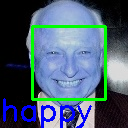

In [71]:
#dodavanje neophodnog teksta raspoloženja na slici
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
            predictions[0]['dominant_emotion'],
            (0,120),
            font,
            1,
            (0, 0, 255),
            2,
            cv2.LINE_4)

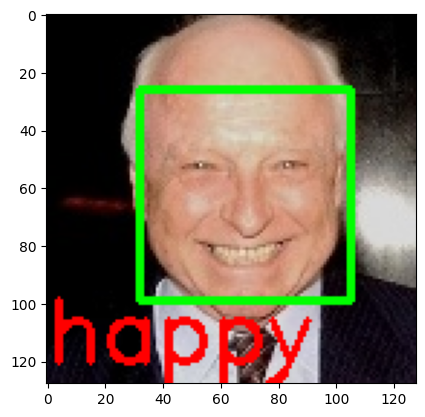

In [72]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# **Zaključak**


Ova studija istražuje primenu dubokog učenja u detekciji godina, emocija i pola na slikama, suočavajući se s izazovom loše kvalitetnih fotografija u datasetu. Iako su slike bile lošeg kvaliteta, implementirane su tehnike pretprocesiranja podataka i prilagođavanja modela kako bi se postigao zadovoljavajući rezultat. Istraživanje naglašava važnost prilagođavanja dubokih modela za specifičnosti dataset-a radi postizanja pouzdanih rezultata u detekciji karakteristika slika. Ova analiza pruža korisne smernice za dalji razvoj tehnologija računarske vizije, naročito u kontekstu detekcije karakteristika na slikama u stvarnim scenarijima.

Modeli su kreirani i trenirani uz pomoć Keras biblioteke.

Svaki novi projekat donosi neko iskustvo, na primer ovaj otvara nova vrata koja se zovu *machine learning*, koja iz godine u godinu pokazuje koliko je moćna.

# **Reference**
https://sr.wikipedia.org/sr-el/%D0%94%D1%83%D0%B1%D0%BE%D0%BA%D0%BE_%D1%83%D1%87%D0%B5%D1%9A%D0%B5

https://en.wikipedia.org/wiki/Machine_learning

Materijal sa vežbi

https://keras.io/api/applications/

https://github.com/serengil/deepface